### Lab-7: EE5175 Image Signal Processing
#### Ayush Mukund Jamdar EE20B018

In this assignment, we analyze DFT, Magnitude-Phase Dominance, and Rotation Property. 

#### 1. Implement 2D DFT 
Using row-column decomposition. 

In [79]:
# Basic Helper Functions

# load modules
import numpy as np
from PIL import Image # for image loading and saving
from IPython.display import display
from matplotlib import pyplot as plt
import matplotlib.cm as cm

# Convert a grayscale png/jpg image to a numpy array
# of ints 0 to 256
def image2array(filename, colour=False):
    image = Image.open(filename)

    if colour:
        image = image.convert('L')
        image = image.resize((800, 500))
        # convert to black and white

    return np.array(image)

# Save a 2D numpy array as an image in jpg/png
def saveArrAsImage(image_array, filepath, file_format):
    image = Image.fromarray(image_array)
    # image.show()
    image.save(filepath, file_format)
    return

# Display a 2D numpy array as an image in the notebook
def displayImageArray(image_array):
    image = Image.fromarray(image_array)
    display(image)

In [80]:
def dft_rowcol_decomp(image_mat):
    # dimensions
    m, n = image_mat.shape
    
    # DFT of rows
    dft_of_rows = np.fft.fft(image_mat, axis=1)

    # DFT of columns of this matrix
    dft_of_cols = np.fft.fft(dft_of_rows, axis=0)
    
    # Rearrange the FFT for the sake of visualization
    dft_2d = np.fft.fftshift(dft_of_cols)

    # normalize magnitude to get a unitary transform
    return dft_2d / np.sqrt(m * n)
    

#### 2. Compute DFTs of Images

Here we will DFT process the images `fourier.pgm` and `fourier_transform.pgm` to obtain $I_1$ and $I_2$ respectively. 

Let's first display the input images. 


fourier.png


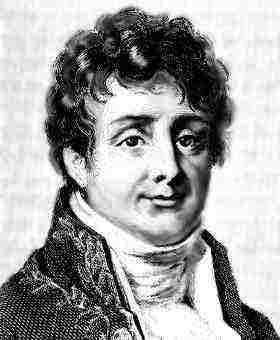

fourier_transform.png


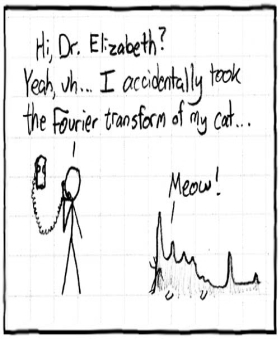

In [81]:
image_1 = image2array('fourier.png')
image_2 = image2array('fourier_transform.png')

print("fourier.png")
displayImageArray(image_1)

print("fourier_transform.png")
displayImageArray(image_2)

Haha, it is Fourier himself. 

In [82]:
# DFT of image 1
dft_1 = dft_rowcol_decomp(image_1)

# DFT of image 2
dft_2 = dft_rowcol_decomp(image_2)

Let's see what the phase and magnitude looks like.

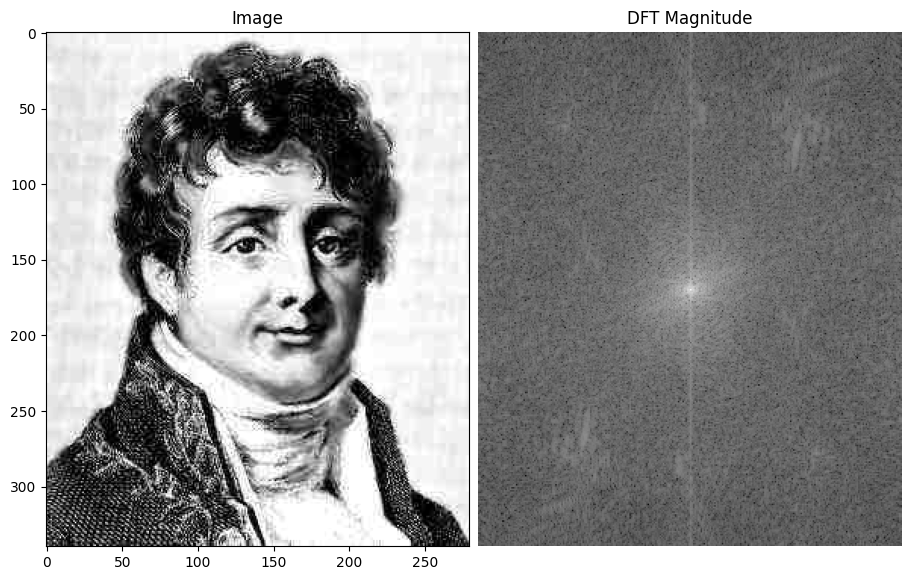

In [93]:
# Image 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 12), constrained_layout=True)
ax1.imshow(image_1, 'gray')
ax2.imshow(np.log10(np.abs(dft_1)), 'gray')
ax1.title.set_text('Image')
ax2.title.set_text('DFT Magnitude')
plt.axis('off')
plt.show()

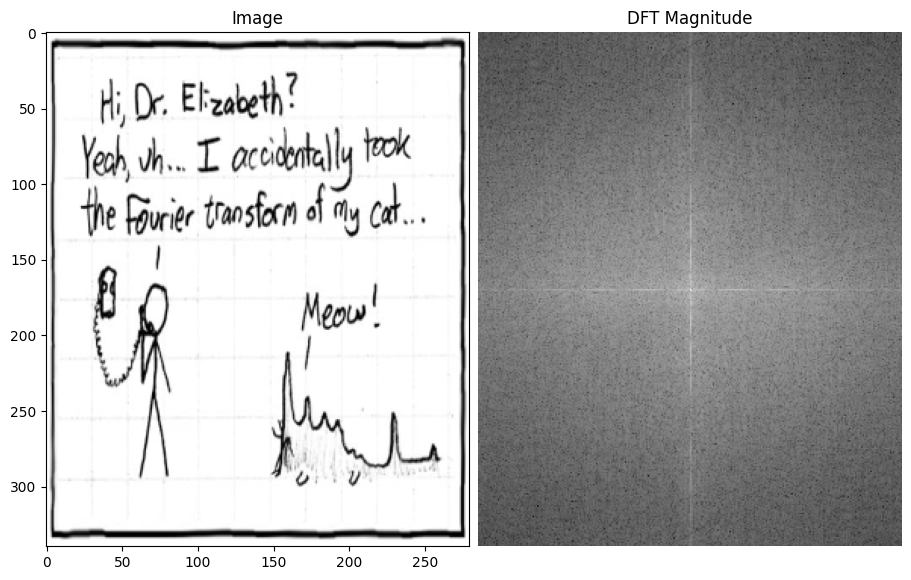

In [84]:
# Image 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 12), constrained_layout=True)
ax1.imshow(image_2, 'gray')
ax2.imshow(np.log10(np.abs(dft_2)), 'gray')
ax1.title.set_text('Image')
ax2.title.set_text('DFT Magnitude')
plt.axis('off')
plt.show()

Note that the horizontal white line appearing in this image is due to the fact that there are many vertical lines in `fourier_transform.png`. In DFT, this translates to invariance along the vertical lines, thus a DC component. 

Now, we mix the two magnitudes and phases to generate two new DFTs, `dft_3` and `dft_4`. Further, we are required to find images that give this transform. 

In [86]:
dft_3 = np.abs(dft_1) * np.exp(1j * np.angle(dft_2))
dft_4 = np.abs(dft_2) * np.exp(1j * np.angle(dft_1))

To obtain images from these DFTs, we take an inverse DFT.

In [87]:
def get_idft_mag(dft_mat):

    m, n = dft_mat.shape

    # we only need to fftshift once since the operation is vectorial
    idft_of_cols = np.fft.ifft(np.fft.fftshift(dft_mat), axis=0)

    idft_of_rows = np.fft.ifft(idft_of_cols, axis=1)

    return np.abs(idft_of_rows) / np.sqrt(m * n)

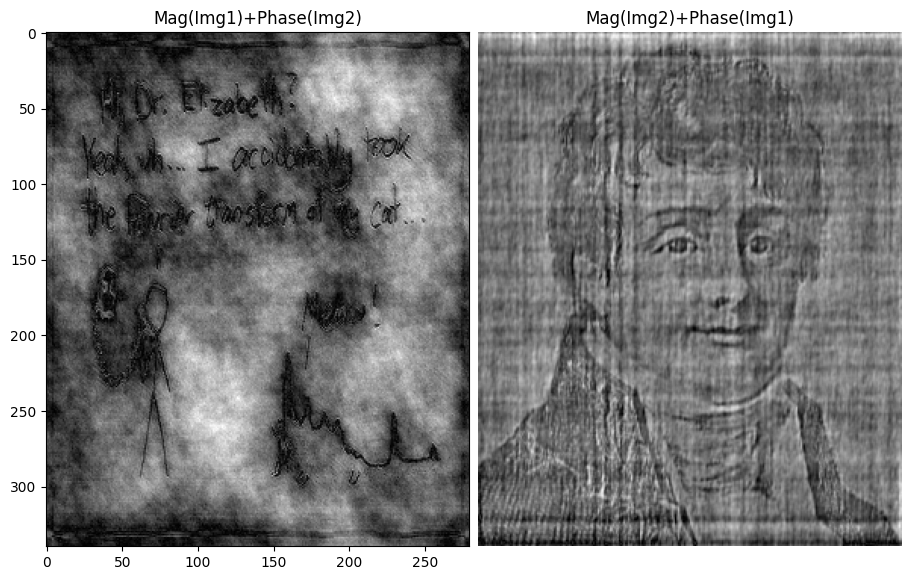

In [88]:
idft_mag_3 = get_idft_mag(dft_3)
idft_mag_4 = get_idft_mag(dft_4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 12), constrained_layout=True)
ax1.imshow(idft_mag_3, 'gray')
ax2.imshow(idft_mag_4, 'gray')
ax1.title.set_text('Mag(Img1)+Phase(Img2)')
ax2.title.set_text('Mag(Img2)+Phase(Img1)')
plt.axis('off')
plt.show()

As one may observe, the phase dominates and contains most of the image information. When mixed, the phase determines what the image most closely looks like. Thus image perceptibility largely depends on DFT phase. 

The third optional question is skipped due to time constraints. 